<a href="https://colab.research.google.com/github/Tyburon02/Turing_Python/blob/master/Python_Project_Turing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Using Python for Marketing Campaign Analysis**

**Objective**

The primary objective of this project is to showcase how Python and Python libraries can be used to perform data analysis for marketing campaign data, by extracting actionable insights with a focus on time-based analysis.

**Project steps using EDA principles:**

- ***Data Cleaning***: Addressing missing values, ensuring data integrity, and filtering data for specific campaigns.
- ***Data Aggregation***: Summarizing data to derive insights, with a new focus on time-based metrics like hourly conversions and weekday analysis.
- ***Visualization:*** Employing various chart types to reveal underlying data patterns, trends, and anomalies.
- **Comparative Analysis**: *italicized text* Evaluating metrics across different campaigns to discern best practices and areas needing improvement, enhanced with time-based comparisons.

**Script Structure and Analysis**
The script begins with loading and cleaning the dataset, focusing on campaigns of interest and expanding to include hourly and weekday metrics.
I utilized **pandas** for data manipulation and **matplotlib** and **seaborn** for visualizations.

**The script features:**
- Bar charts for metric comparison across campaigns.
- Line charts for hourly conversion trends.
- Bar charts for aggregated weekly conversions.

Each visualization is created to provide specific insights, including budget management, campaign efficacy, user engagement, and temporal dynamics.

**Conclusion**
This project showcases the power of Python and its libraries in conducting thorough marketing data analysis. Through EDA, we gain valuable insights that can guide strategic decisions and optimize marketing campaign effectiveness.

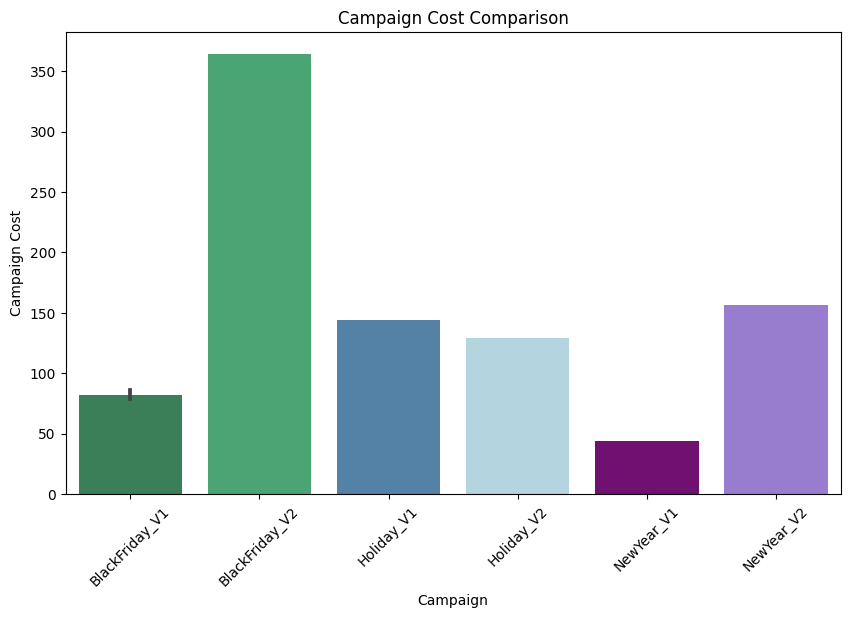

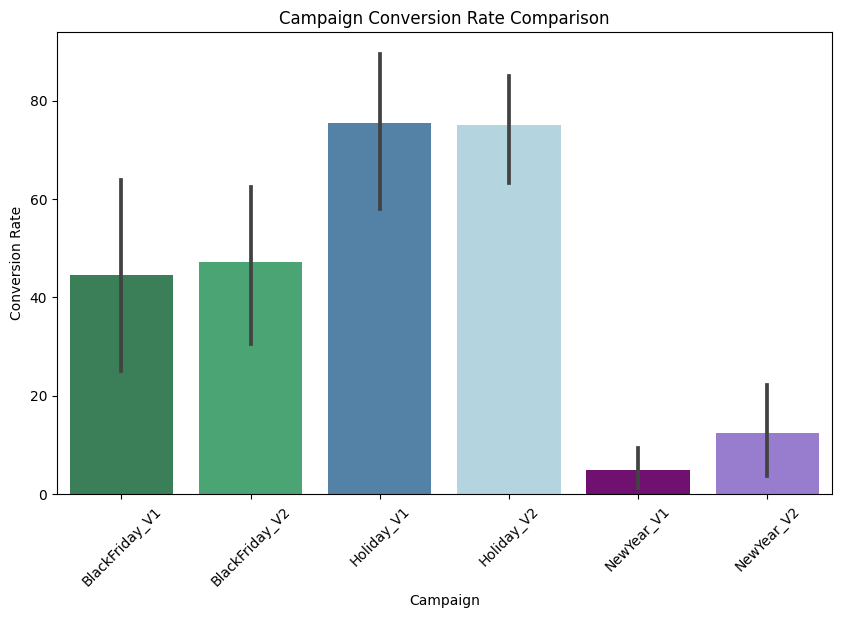

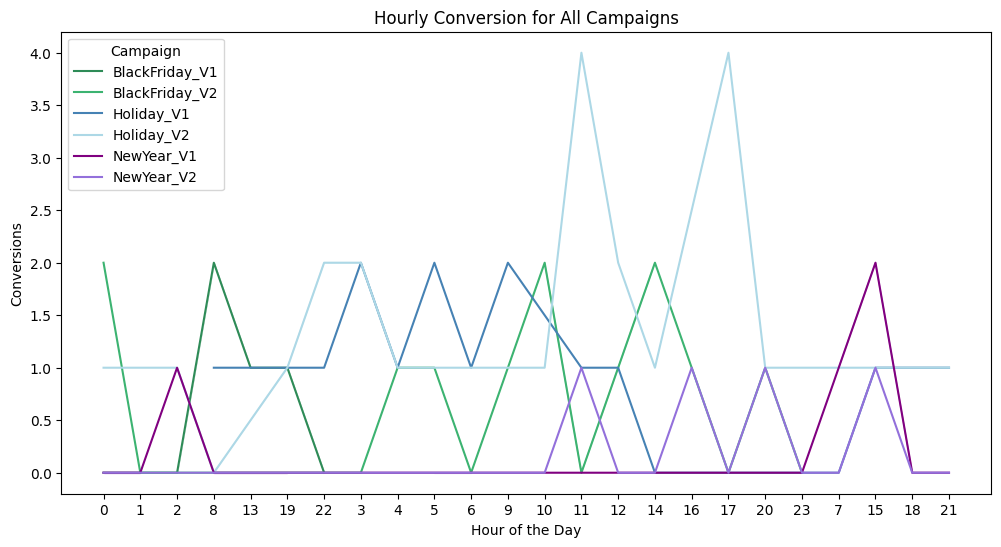

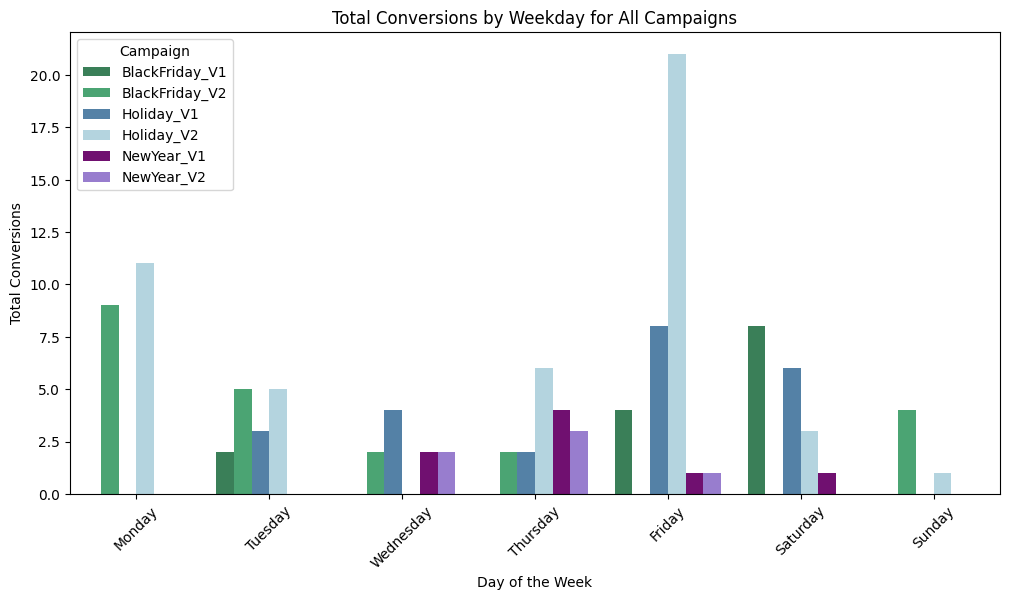

In [7]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def load_data_from_google_sheets(sheet_url, worksheet_name):
    creds, _ = default()
    gc = gspread.authorize(creds)

    # Open the spreadsheet by URL and select the worksheet
    worksheet = gc.open_by_url(sheet_url).worksheet(worksheet_name)

    # Get all values in the sheet
    rows = worksheet.get_all_values()

    # Convert to DataFrame
    df = pd.DataFrame.from_records(rows[1:], columns=rows[0])

    # Convert numeric columns to appropriate types
    numeric_cols = ['campaign_cost', 'total_revenue', 'total_conversions', 'total_visits',
                    'single_action_sessions', 'purchases_count', 'user_count',
                    'campaign_revenue', 'visits_by_hour', 'conversions_by_hour']
    for col in numeric_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Data cleaning and filtering steps here
    df.fillna(0, inplace=True)
    campaigns_of_interest = ['BlackFriday_V1', 'BlackFriday_V2', 'Holiday_V1', 'Holiday_V2', 'NewYear_V1', 'NewYear_V2']
    df = df[df['campaign'].isin(campaigns_of_interest)]

    return df


# Creating a dictionary for color mapping of each campaign
campaign_colors = {
    'BlackFriday_V1': 'seagreen',
    'BlackFriday_V2': 'mediumseagreen',
    'Holiday_V1': 'steelblue',
    'Holiday_V2': 'lightblue',
    'NewYear_V1': 'purple',
    'NewYear_V2': 'mediumpurple'
}
def plot_hourly_conversion(data, color_map):
    """
    Plot the hourly conversion for all campaigns across a day.
    """
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=data, x="hour_of_day", y="conversions_by_hour", hue="campaign", palette=color_map )
    plt.title('Hourly Conversion for All Campaigns')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Conversions')
    plt.legend(title='Campaign', loc='upper left')
    plt.xticks(range(24))
    plt.show()

def plot_weekday_conversion(data, color_map):
    """
    Plot the total conversions for all campaigns across each day of the week in chronological order.
    """
    # Define the order of the days of the week
    weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
    data['weekday_name'] = pd.Categorical(data['weekday_name'], categories=weekday_order, ordered=True)
    # Aggregate and plot the data
    aggregated_data = data.groupby(['campaign', 'weekday_name'])['conversions_by_hour'].sum().reset_index()
    plt.figure(figsize=(12, 6))
    sns.barplot(data=aggregated_data, x="weekday_name", y="conversions_by_hour", hue="campaign", palette=color_map, order=weekday_order)
    plt.title('Total Conversions by Weekday for All Campaigns')
    plt.xlabel('Day of the Week')
    plt.ylabel('Total Conversions')
    plt.legend(title='Campaign', loc='upper left')
    plt.xticks(rotation=45)
    plt.show()

def plot_metric_comparison_with_colors(data, metric, color_map, title):
    """
    Plot a comparison of a given metric across different campaigns with consistent color mapping.
    """
    plt.figure(figsize=(10, 6))
    sns.barplot(data=data, x="campaign", y=metric, palette=color_map)
    plt.title(title)
    plt.xlabel('Campaign')
    plt.ylabel(metric.replace('_', ' ').title())
    plt.xticks(rotation=45)
    plt.show()

def plot_line_chart_for_metric(data, metric, color_map, title):
    """
    Plot a line chart for a given metric across different campaigns.
    """
    aggregated_data = data.groupby('campaign')[metric].sum().reset_index()
    plt.figure(figsize=(10, 6))
    sns.barplot(data=aggregated_data, x="campaign", y=metric, palette=color_map)
    plt.title(title)
    plt.xlabel('Campaign')
    plt.ylabel(metric.replace('_', ' ').title())
    plt.xticks(rotation=45)
    plt.show()

# Main script execution
if __name__ == "__main__":
    # URL of the Google Sheet and worksheet name
    sheet_url = 'https://docs.google.com/spreadsheets/d/1OL-BzsyejA2BsLu_FqyPkALlHQtCZDH_LoQ0-r4xijw/edit?usp=sharing'
    worksheet_name = 'Campaign_Metrics'

    # Load data from Google Sheets
    data = load_data_from_google_sheets(sheet_url, worksheet_name)

    if data is not None:
        # Calculate the conversion rate if needed
        # 'conversion_rate' is defined as 'conversions_by_hour' / 'visits_by_hour' * 100
        if 'conversion_rate' not in data.columns:
            data['conversion_rate'] = data['conversions_by_hour'] / data['visits_by_hour'] * 100

        # Visualizations with consistent formatting and color mapping
        plot_metric_comparison_with_colors(data, 'campaign_cost', campaign_colors, 'Campaign Cost Comparison')
        plot_metric_comparison_with_colors(data, 'conversion_rate', campaign_colors, 'Campaign Conversion Rate Comparison')
        plot_hourly_conversion(data, campaign_colors)
        plot_weekday_conversion(data, campaign_colors)

